## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若想使用可自行開啟)
#os.environ["CUDA_VISIBLE_DEVICES"] = ""
#Blas GEMM launch failed , 避免動態分配GPU / CPU, 出現問題
import tensorflow as tf
gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.333)
sess = tf.Session(config=tf.ConfigProto(gpu_options=gpu_options))

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
"""Code Here
設定超參數
"""
LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
EPOCHS = 50
BATCH_SIZE = 128
MOMENTUM = 0.75

In [7]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=lr, nesterov=False, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}





Experiment with LR = 0.100000


Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast r

50000/50000 [==============================] - 3s 53us/step - loss: 1.1164 - acc: 0.5979 - val_loss: 1.5692 - val_acc: 0.4864
Epoch 31/50
50000/50000 [==============================] - 3s 52us/step - loss: 1.1091 - acc: 0.5989 - val_loss: 1.5485 - val_acc: 0.4907
Epoch 32/50
50000/50000 [==============================] - 3s 53us/step - loss: 1.1037 - acc: 0.6023 - val_loss: 1.5426 - val_acc: 0.4926
Epoch 33/50
50000/50000 [==============================] - 3s 56us/step - loss: 1.0836 - acc: 0.6096 - val_loss: 1.5014 - val_acc: 0.4998
Epoch 34/50
50000/50000 [==============================] - 3s 52us/step - loss: 1.0759 - acc: 0.6128 - val_loss: 1.5478 - val_acc: 0.4945
Epoch 35/50
50000/50000 [==============================] - 3s 52us/step - loss: 1.0794 - acc: 0.6088 - val_loss: 1.5403 - val_acc: 0.4932
Epoch 36/50
50000/50000 [==============================] - 3s 52us/step - loss: 1.0549 - acc: 0.6211 - val_loss: 1.5400 - val_acc: 0.5032
Epoch 37/50
50000/50000 [=====================

50000/50000 [==============================] - 3s 52us/step - loss: 0.8902 - acc: 0.6823 - val_loss: 1.3862 - val_acc: 0.5337
Epoch 32/50
50000/50000 [==============================] - 3s 52us/step - loss: 0.8713 - acc: 0.6905 - val_loss: 1.3728 - val_acc: 0.5391
Epoch 33/50
50000/50000 [==============================] - 3s 52us/step - loss: 0.8490 - acc: 0.6994 - val_loss: 1.4011 - val_acc: 0.5365
Epoch 34/50
50000/50000 [==============================] - 3s 52us/step - loss: 0.8267 - acc: 0.7070 - val_loss: 1.4529 - val_acc: 0.5277
Epoch 35/50
50000/50000 [==============================] - 3s 52us/step - loss: 0.8214 - acc: 0.7082 - val_loss: 1.3963 - val_acc: 0.5372
Epoch 36/50
50000/50000 [==============================] - 3s 52us/step - loss: 0.8061 - acc: 0.7109 - val_loss: 1.4345 - val_acc: 0.5419
Epoch 37/50
50000/50000 [==============================] - 3s 52us/step - loss: 0.7791 - acc: 0.7229 - val_loss: 1.4605 - val_acc: 0.5326
Epoch 38/50
50000/50000 [=====================

50000/50000 [==============================] - 3s 55us/step - loss: 1.3759 - acc: 0.5151 - val_loss: 1.4302 - val_acc: 0.4960
Epoch 33/50
50000/50000 [==============================] - 3s 52us/step - loss: 1.3671 - acc: 0.5187 - val_loss: 1.4320 - val_acc: 0.4905
Epoch 34/50
50000/50000 [==============================] - 3s 52us/step - loss: 1.3603 - acc: 0.5222 - val_loss: 1.4371 - val_acc: 0.4864
Epoch 35/50
50000/50000 [==============================] - 3s 52us/step - loss: 1.3503 - acc: 0.5251 - val_loss: 1.4228 - val_acc: 0.4963
Epoch 36/50
50000/50000 [==============================] - 3s 52us/step - loss: 1.3428 - acc: 0.5279 - val_loss: 1.4151 - val_acc: 0.5004
Epoch 37/50
50000/50000 [==============================] - 3s 52us/step - loss: 1.3355 - acc: 0.5308 - val_loss: 1.4304 - val_acc: 0.4941
Epoch 38/50
50000/50000 [==============================] - 3s 52us/step - loss: 1.3258 - acc: 0.5344 - val_loss: 1.4340 - val_acc: 0.4916
Epoch 39/50
50000/50000 [=====================

50000/50000 [==============================] - 3s 52us/step - loss: 1.7754 - acc: 0.3797 - val_loss: 1.7776 - val_acc: 0.3740
Epoch 34/50
50000/50000 [==============================] - 3s 52us/step - loss: 1.7715 - acc: 0.3803 - val_loss: 1.7729 - val_acc: 0.3779
Epoch 35/50
50000/50000 [==============================] - 3s 52us/step - loss: 1.7671 - acc: 0.3823 - val_loss: 1.7693 - val_acc: 0.3789
Epoch 36/50
50000/50000 [==============================] - 3s 52us/step - loss: 1.7633 - acc: 0.3833 - val_loss: 1.7652 - val_acc: 0.3789
Epoch 37/50
50000/50000 [==============================] - 3s 52us/step - loss: 1.7595 - acc: 0.3846 - val_loss: 1.7613 - val_acc: 0.3820
Epoch 38/50
50000/50000 [==============================] - 3s 52us/step - loss: 1.7560 - acc: 0.3866 - val_loss: 1.7576 - val_acc: 0.3832
Epoch 39/50
50000/50000 [==============================] - 3s 52us/step - loss: 1.7521 - acc: 0.3866 - val_loss: 1.7551 - val_acc: 0.3836
Epoch 40/50
50000/50000 [=====================

50000/50000 [==============================] - 3s 52us/step - loss: 2.1211 - acc: 0.2641 - val_loss: 2.1181 - val_acc: 0.2613
Epoch 35/50
50000/50000 [==============================] - 3s 52us/step - loss: 2.1172 - acc: 0.2661 - val_loss: 2.1142 - val_acc: 0.2633
Epoch 36/50
50000/50000 [==============================] - 3s 52us/step - loss: 2.1134 - acc: 0.2672 - val_loss: 2.1104 - val_acc: 0.2641
Epoch 37/50
50000/50000 [==============================] - 3s 55us/step - loss: 2.1096 - acc: 0.2693 - val_loss: 2.1067 - val_acc: 0.2664
Epoch 38/50
50000/50000 [==============================] - 3s 52us/step - loss: 2.1058 - acc: 0.2703 - val_loss: 2.1030 - val_acc: 0.2678
Epoch 39/50
50000/50000 [==============================] - 3s 52us/step - loss: 2.1022 - acc: 0.2724 - val_loss: 2.0994 - val_acc: 0.2692
Epoch 40/50
50000/50000 [==============================] - 3s 52us/step - loss: 2.0985 - acc: 0.2733 - val_loss: 2.0959 - val_acc: 0.2693
Epoch 41/50
50000/50000 [=====================

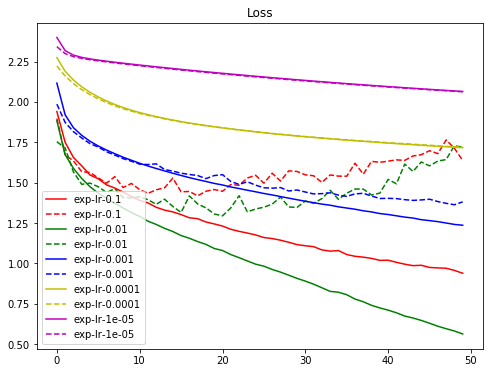

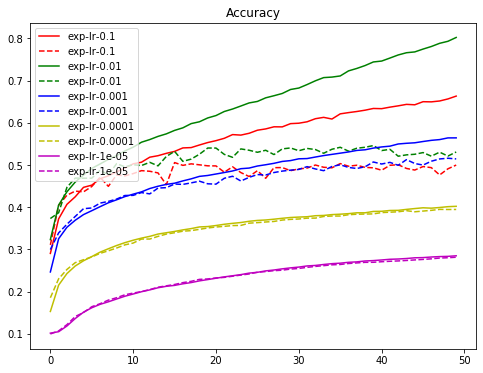

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()